## Máster en Big Data y Data Science

### Metodologías de gestión y diseño de proyectos de big data

#### AP2 - Modelado

---

En esta libreta se comienzan a ejecutar las actividades correspondientes a la fase de modelado. 

---

### Carga de librerias a utilizar

In [43]:
# Se importan las librerias a utilizar
import pandas as pd
import numpy as np

# Para registro de toda la experimentación
import mlflow

# Para la generación de los sets de train - test
from sklearn.model_selection import train_test_split

#Importaciones varias para la evaluación
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [44]:
import sklearn
print(sklearn.__version__)

1.3.1


### Lectura del dataset generado previamente

In [45]:
# Se hace la lectura del dataset del seminario y se obtiene su cabecera
datos = pd.read_csv('../../data/final/datos_finales.csv', sep=';')
datos.head()

,operaciones_ult_12m,gastos_ult_12m,limite_credito_tc,antiguedad_cliente,tasa_interes,ingresos,pct_ingreso,antiguedad_empleado,edad,estado_civil_N,...,importe_solicitado,duracion_credito,situacion_vivienda,objetivo_credito,falta_pago,estado_cliente,genero,nivel_educativo,nivel_tarjeta,personas_a_cargo
0,mayor_100,mayor_10k,3k_a_5k,2y_a_4y,hasta_7p,50k_a_100k,hasta_20,5_a_10,menor_25,C,...,11000,3,HIPOTECA,INVERSIONES,N,ACTIVO,F,SECUNDARIO_COMPLETO,Blue,3.0
1,15_a_30,menor_1k,3k_a_5k,2y_a_4y,15p_a_20p,20k_a_50k,hasta_20,menor_5,menor_25,S,...,1500,2,ALQUILER,MEJORAS_HOGAR,Y,PASIVO,M,DESCONOCIDO,Blue,0.0
2,15_a_30,2k_a_4k,5k_a_10k,2y_a_4y,7p_a_15p,20k_a_50k,20_a_40,5_a_10,menor_25,D,...,10000,2,OTROS,EDUCACIÓN,Y,PASIVO,M,POSGRADO_COMPLETO,Blue,3.0
3,75_a_100,2k_a_4k,menor_3k,menor_2y,7p_a_15p,20k_a_50k,20_a_40,menor_5,25_a_30,S,...,6000,4,ALQUILER,INVERSIONES,N,ACTIVO,F,UNIVERSITARIO_INCOMPLETO,Blue,2.0
4,50_a_75,4k_a_6k,3k_a_5k,2y_a_4y,7p_a_15p,50k_a_100k,20_a_40,menor_5,25_a_30,C,...,10000,2,HIPOTECA,EDUCACIÓN,N,ACTIVO,F,UNIVERSITARIO_INCOMPLETO,Blue,2.0


### Revisión de meta-datos

In [46]:
def reporte_descripcion_dataset(df):
    columnas = df.columns
    print("Columnas del dataset:\n")
    for col in columnas:
        print(col)
    print(f"\nCantidad de filas: {df.shape[0]}")

print("Descripción del dataset 'datos_completos'")
reporte_descripcion_dataset(datos)

Descripción del dataset 'datos_completos'
Columnas del dataset:

operaciones_ult_12m
gastos_ult_12m
limite_credito_tc
antiguedad_cliente
tasa_interes
ingresos
pct_ingreso
antiguedad_empleado
edad
estado_civil_N
estado_credito_N
importe_solicitado
duracion_credito
situacion_vivienda
objetivo_credito
falta_pago
estado_cliente
genero
nivel_educativo
nivel_tarjeta
personas_a_cargo

Cantidad de filas: 10101


### Armado de los sets de entrenamiento y testeo

In [48]:
# Se separan los atributos de datos de los de la etiqueta del dataset

labels = datos.falta_pago.values

features = datos[['operaciones_ult_12m', 'gastos_ult_12m', 'limite_credito_tc',
       'antiguedad_cliente', 'tasa_interes', 'ingresos', 'pct_ingreso',
       'antiguedad_empleado', 'edad', 'importe_solicitado', 'duracion_credito',
       'situacion_vivienda', 'objetivo_credito', 'estado_credito_N',
       'estado_civil_N', 'estado_cliente', 'genero',
       'nivel_educativo', 'personas_a_cargo']]

print(f"Vista de los datos del atributo target: \n{labels[:10]}")
print("-"*50)
print("Vista parcial de los datos sin el atributo target:")
features.head()

Vista de los datos del atributo target: 
['N' 'Y' 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'N']
--------------------------------------------------
Vista parcial de los datos sin el atributo target:


,operaciones_ult_12m,gastos_ult_12m,limite_credito_tc,antiguedad_cliente,tasa_interes,ingresos,pct_ingreso,antiguedad_empleado,edad,importe_solicitado,duracion_credito,situacion_vivienda,objetivo_credito,estado_credito_N,estado_civil_N,estado_cliente,genero,nivel_educativo,personas_a_cargo
0,mayor_100,mayor_10k,3k_a_5k,2y_a_4y,hasta_7p,50k_a_100k,hasta_20,5_a_10,menor_25,11000,3,HIPOTECA,INVERSIONES,C,C,ACTIVO,F,SECUNDARIO_COMPLETO,3.0
1,15_a_30,menor_1k,3k_a_5k,2y_a_4y,15p_a_20p,20k_a_50k,hasta_20,menor_5,menor_25,1500,2,ALQUILER,MEJORAS_HOGAR,P,S,PASIVO,M,DESCONOCIDO,0.0
2,15_a_30,2k_a_4k,5k_a_10k,2y_a_4y,7p_a_15p,20k_a_50k,20_a_40,5_a_10,menor_25,10000,2,OTROS,EDUCACIÓN,C,D,PASIVO,M,POSGRADO_COMPLETO,3.0
3,75_a_100,2k_a_4k,menor_3k,menor_2y,7p_a_15p,20k_a_50k,20_a_40,menor_5,25_a_30,6000,4,ALQUILER,INVERSIONES,C,S,ACTIVO,F,UNIVERSITARIO_INCOMPLETO,2.0
4,50_a_75,4k_a_6k,3k_a_5k,2y_a_4y,7p_a_15p,50k_a_100k,20_a_40,menor_5,25_a_30,10000,2,HIPOTECA,EDUCACIÓN,C,C,ACTIVO,F,UNIVERSITARIO_INCOMPLETO,2.0


In [49]:
# Se pasa a binarizar los atributos

data = pd.get_dummies(features)
data.head()

,importe_solicitado,duracion_credito,personas_a_cargo,operaciones_ult_12m_15_a_30,operaciones_ult_12m_30_a_50,operaciones_ult_12m_50_a_75,operaciones_ult_12m_75_a_100,operaciones_ult_12m_mayor_100,operaciones_ult_12m_menor_15,gastos_ult_12m_2k_a_4k,...,estado_cliente_ACTIVO,estado_cliente_PASIVO,genero_F,genero_M,nivel_educativo_DESCONOCIDO,nivel_educativo_POSGRADO_COMPLETO,nivel_educativo_POSGRADO_INCOMPLETO,nivel_educativo_SECUNDARIO_COMPLETO,nivel_educativo_UNIVERSITARIO_COMPLETO,nivel_educativo_UNIVERSITARIO_INCOMPLETO
0,11000,3,3.0,False,False,False,False,True,False,False,...,True,False,True,False,False,False,False,True,False,False
1,1500,2,0.0,True,False,False,False,False,False,False,...,False,True,False,True,True,False,False,False,False,False
2,10000,2,3.0,True,False,False,False,False,False,True,...,False,True,False,True,False,True,False,False,False,False
3,6000,4,2.0,False,False,False,True,False,False,True,...,True,False,True,False,False,False,False,False,False,True
4,10000,2,2.0,False,False,True,False,False,False,False,...,True,False,True,False,False,False,False,False,False,True


In [50]:
# Para evitar problemas con mlfow se hace una conversión de integer a double 
# de los atributos: 'importe_solicitado', 'duracion_credito', 'estado_credito'

# Se filtran las columnas del tipo integer
integer_columns = data.select_dtypes(include='int').columns

# Convert integer columns to double
data[integer_columns] = data[integer_columns].astype('float')

In [51]:
# Se reparten los datos disponibles en conjuntos para entrenamiento y testeo

train_data, test_data, train_labels, test_labels = train_test_split(data, labels) 

# Toma por defecto 75% (entrenamiento) - 25% (testeo)

# Vista de los datos de entrenamiento para una fila

print(f"Un registro de entrenamiento: \n{train_data.iloc[1]}")
print("-"*50)
print(f"Label del registro: \n{train_labels[1]}\n")

print("#"*50)
print("#"*50)

# Vista de los datos de testeo para una fila

print(f"\nUn registro de testeo: \n{test_data.iloc[1]}")
print("-"*50)
print(f"Label del registro: \n{test_labels[1]}")

Un registro de entrenamiento: 
importe_solicitado                          5000.0
duracion_credito                               4.0
personas_a_cargo                               3.0
operaciones_ult_12m_15_a_30                  False
operaciones_ult_12m_30_a_50                  False
                                             ...  
nivel_educativo_POSGRADO_COMPLETO            False
nivel_educativo_POSGRADO_INCOMPLETO          False
nivel_educativo_SECUNDARIO_COMPLETO          False
nivel_educativo_UNIVERSITARIO_COMPLETO        True
nivel_educativo_UNIVERSITARIO_INCOMPLETO     False
Name: 7405, Length: 65, dtype: object
--------------------------------------------------
Label del registro: 
N

##################################################
##################################################

Un registro de testeo: 
importe_solicitado                          8000.0
duracion_credito                               3.0
personas_a_cargo                               0.0
operaciones_ult

In [52]:
# Configuración de la evaluación

def evaluar_modelo(modelo, test_data, test_labels):
    prediction = modelo.predict(test_data)
    print('Rendimiento obtenido:',accuracy_score(test_labels,prediction))
    print('Reporte de indicadores:\n',classification_report(test_labels,prediction))
    print('Matriz de confusión:')
    cm = confusion_matrix(test_labels, prediction, labels=modelo.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                   display_labels=modelo.classes_)
    disp.plot()
    plt.show()

In [53]:
# Para obtener todos los parámetros y no solo los modificados

from sklearn import set_config

set_config(print_changed_only=False)

### Generación de modelos


### Prueba #1

ZeroR

In [33]:
from sklearn.dummy import DummyClassifier

clf = DummyClassifier()
clf.fit(train_data, train_labels)

2023/12/01 09:10:37 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '34e62c63a4f94e38aa0e4f219e4225bc', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
c:\Users\usuario\anaconda3\envs\VIU-13MBID\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


DummyClassifier(constant=None, random_state=None, strategy='prior')

In [34]:
prediction = clf.predict(test_data)

print('Rendimiento obtenido:',accuracy_score(test_labels, prediction))
print('Vista de una muestra de valores de predicción y datos de testeo:')
print(prediction[:10])
print(test_labels[:10])

Rendimiento obtenido: 0.8305621536025336
Vista de una muestra de valores de predicción y datos de testeo:
['N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N']
['N' 'N' 'N' 'N' 'N' 'N' 'Y' 'N' 'N' 'N']


----
Se pasa a configurar la serie de experimentos en **mlflow**

In [35]:
# Se establece un nombre para identificar la serie de experimentos

mlflow.set_experiment(experiment_name="Prueba #1")
mlflow.autolog()

Traceback (most recent call last):
  File "c:\Users\usuario\anaconda3\envs\VIU-13MBID\Lib\site-packages\mlflow\store\tracking\file_store.py", line 303, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\usuario\anaconda3\envs\VIU-13MBID\Lib\site-packages\mlflow\store\tracking\file_store.py", line 396, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\usuario\anaconda3\envs\VIU-13MBID\Lib\site-packages\mlflow\store\tracking\file_store.py", line 1304, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\usuario\anaconda3\envs\VIU-13MBID\Lib\site-packages\mlflow\store\tracking\file_store.py", line 1297, in _read_helper
    result = read_yaml(root,

2023/12/01 09:11:00 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


#### Regresión Logística

In [36]:
from sklearn.linear_model import LogisticRegression

with mlflow.start_run(run_name='Logistic Regression'):
    lreg = LogisticRegression(solver = 'liblinear')

    lreg.fit(train_data, train_labels)

Rendimiento obtenido: 0.8812351543942993
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.92      0.94      0.93      2098
           Y       0.67      0.59      0.63       428

    accuracy                           0.88      2526
   macro avg       0.79      0.77      0.78      2526
weighted avg       0.88      0.88      0.88      2526

Matriz de confusión:


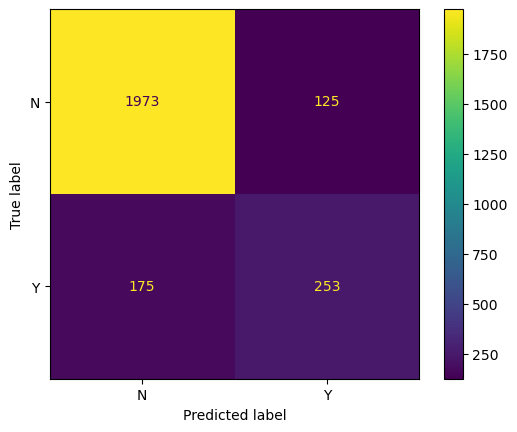

In [38]:
evaluar_modelo(lreg, test_data, test_labels)

#### KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier

with mlflow.start_run(run_name='KNN'):
    knn = KNeighborsClassifier(n_neighbors=50, 
                               algorithm = 'ball_tree', 
                               leaf_size = 25)

    knn.fit(train_data, train_labels)

Rendimiento obtenido: 0.8333333333333334
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.83      1.00      0.91      2098
           Y       0.77      0.02      0.05       428

    accuracy                           0.83      2526
   macro avg       0.80      0.51      0.48      2526
weighted avg       0.82      0.83      0.76      2526

Matriz de confusión:


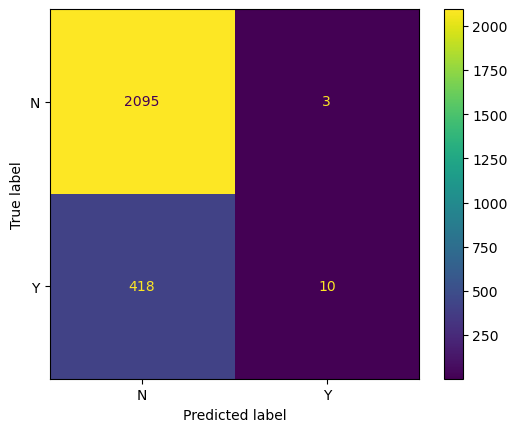

In [40]:
evaluar_modelo(knn, test_data, test_labels)

#### Árboles de Decisión (TDIDT)

In [41]:
from sklearn.tree import DecisionTreeClassifier

with mlflow.start_run(run_name='Decision Tree'):
    dtc = DecisionTreeClassifier(max_depth=3, 
                                 criterion='entropy', 
                                 min_samples_split=10)

    dtc.fit(train_data, train_labels)

Rendimiento obtenido: 0.885193982581156
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.92      0.94      0.93      2098
           Y       0.67      0.62      0.65       428

    accuracy                           0.89      2526
   macro avg       0.80      0.78      0.79      2526
weighted avg       0.88      0.89      0.88      2526

Matriz de confusión:


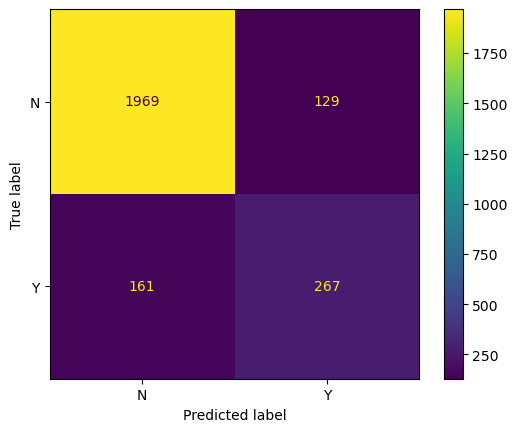

In [42]:
evaluar_modelo(dtc, test_data, test_labels)

#### Métodos de ensamblado de modelos: RandomForest

In [43]:
from sklearn.ensemble import RandomForestClassifier

with mlflow.start_run(run_name='Random Forest'):
    rndf = RandomForestClassifier(n_estimators=10)
    rndf.fit(train_data, train_labels)

Rendimiento obtenido: 0.886381631037213
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.91      0.96      0.93      2098
           Y       0.72      0.53      0.61       428

    accuracy                           0.89      2526
   macro avg       0.82      0.75      0.77      2526
weighted avg       0.88      0.89      0.88      2526

Matriz de confusión:


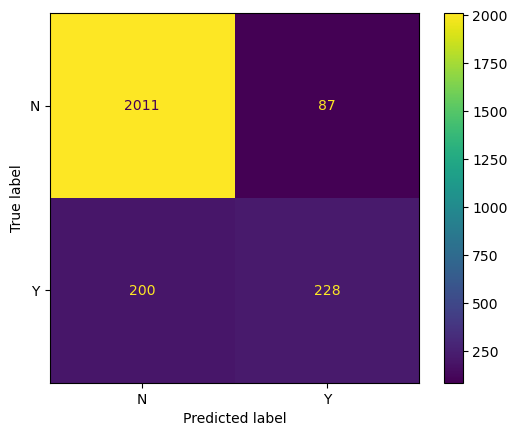

In [44]:
evaluar_modelo(rndf, test_data, test_labels)

----
### Prueba #2

In [54]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from scipy.stats import randint
from scipy.stats import uniform

In [55]:
mlflow.set_experiment(experiment_name="Prueba #2")
mlflow.autolog()

Traceback (most recent call last):
  File "c:\Users\usuario\anaconda3\envs\VIU-13MBID\Lib\site-packages\mlflow\store\tracking\file_store.py", line 303, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\usuario\anaconda3\envs\VIU-13MBID\Lib\site-packages\mlflow\store\tracking\file_store.py", line 396, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\usuario\anaconda3\envs\VIU-13MBID\Lib\site-packages\mlflow\store\tracking\file_store.py", line 1304, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\usuario\anaconda3\envs\VIU-13MBID\Lib\site-packages\mlflow\store\tracking\file_store.py", line 1297, in _read_helper
    result = read_yaml(root,

2023/12/01 18:37:11 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


#### Regresión Logística con parametrización RandomizedSearch

En el siguiente apartado se realiza un proceso de optimización de hiperparámetros mediante el uso de herramientas propiamente desarrolladas para ese fin. Scikit-learn proporciona 2 dos alternativas, la búsqueda aleatoria (RandomizedSearch) y la búsqueda en cuadrícula (GridSearch).

Así pues, en el siguiente ejemplo(RandomizedSearch) param_dist define la cuadrícula de hiperparámetros que se probarán. n_iter especifica cuántas combinaciones aleatorias se probarán. cv es el número de divisiones en la validación cruzada.

In [64]:
param_dist = {
    'C': uniform(0.1, 10),
    'penalty': ['l1', 'l2']
}
# Configura el clasificador y el proceso de búsqueda aleatoria
lr = LogisticRegression()
random_search_lr = RandomizedSearchCV( lr, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', 
                                   verbose=1, n_jobs=-1, random_state=42)

In [65]:
with mlflow.start_run(run_name='Regresión Logística (#2)'):
    random_search_lr.fit(train_data, train_labels)

random_search_lr.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


c:\Users\usuario\anaconda3\envs\VIU-13MBID\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
215 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
215 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\usuario\anaconda3\envs\VIU-13MBID\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\usuario\anaconda3\envs\VIU-13MBID\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\usuario\anaconda3\envs\VIU-13MBID\Lib\site-pa

LogisticRegression(C=7.180725777960454, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Salida de resultado de la evaluación correspondientes a la Prueba #2
Rendimiento obtenido: 0.8776722090261283
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.92      0.93      0.93      2098
           Y       0.65      0.60      0.62       428

    accuracy                           0.88      2526
   macro avg       0.79      0.77      0.78      2526
weighted avg       0.87      0.88      0.88      2526

Matriz de confusión:


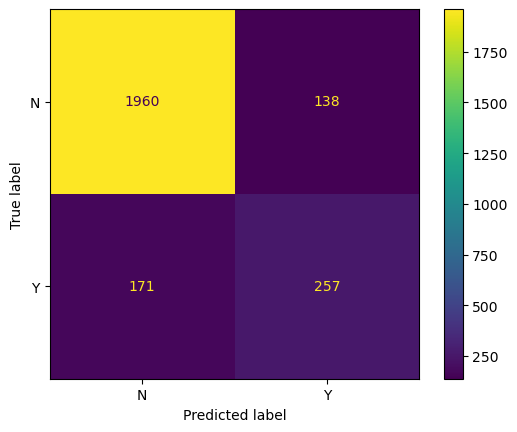

In [66]:
print("Salida de resultado de la evaluación correspondientes a la Prueba #2")
evaluar_modelo(random_search_lr.best_estimator_, test_data, test_labels)

#### Árboles de Decisión con parametrización RandomizedSearch

In [58]:
from sklearn.tree import DecisionTreeClassifier
param_dist = {
    'max_depth': randint(1, 20), 
    'criterion': ['gini', 'entropy'],
    'min_samples_split': randint(2, 20)
}

dtc = DecisionTreeClassifier()
random_search_dtc = RandomizedSearchCV( dtc, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', 
                                   verbose=1, n_jobs=-1, random_state=42)


In [59]:
with mlflow.start_run(run_name='Decision Tree (#2)'):
    random_search_dtc.fit(train_data, train_labels)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


2023/12/01 18:40:02 INFO mlflow.sklearn.utils: Logging the 5 best runs, 95 runs will be omitted.


In [54]:
random_search_dtc.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best')

Salida de resultado de la evaluación correspondientes a la Prueba #2
Rendimiento obtenido: 0.8709422011084719
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.90      0.95      0.92      2078
           Y       0.68      0.52      0.59       448

    accuracy                           0.87      2526
   macro avg       0.79      0.74      0.76      2526
weighted avg       0.86      0.87      0.86      2526

Matriz de confusión:


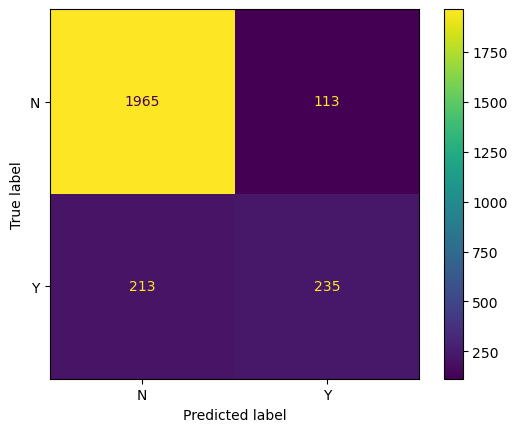

In [61]:
print("Salida de resultado de la evaluación correspondientes a la Prueba #2")
evaluar_modelo(random_search_dtc.best_estimator_, test_data, test_labels)

Se observa una mejora en el valor del rendimiento obtenido, pasando de 0.88 a 0.89

#### KNN con parametrización RandomizedSearch

In [56]:
# Define el espacio de búsqueda de hiperparámetros
param_dist = {
    'n_neighbors': randint(1, 20), 
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Configura el clasificador y el proceso de búsqueda aleatoria
knn = KNeighborsClassifier()

random_search_KNN = RandomizedSearchCV( knn, param_distributions=param_dist, 
    n_iter= 10, cv=5, scoring='accuracy', verbose=1, n_jobs=-1, random_state=42
)

In [57]:
with mlflow.start_run(run_name='KNN (#2)'):
    random_search_KNN.fit(train_data, train_labels)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\usuario\anaconda3\envs\VIU-13MBID\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\usuario\anaconda3\envs\VIU-13MBID\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
2023/12/01 10:23:09 INFO mlflow.sklearn.utils: Logging the 5 best runs, 5 runs will be omitted.


In [58]:
random_search_KNN.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

Salida de resultado de la evaluación correspondientes a la Prueba #2
Rendimiento obtenido: 0.8424386381631037
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.86      0.98      0.91      2098
           Y       0.61      0.19      0.29       428

    accuracy                           0.84      2526
   macro avg       0.73      0.58      0.60      2526
weighted avg       0.81      0.84      0.81      2526

Matriz de confusión:


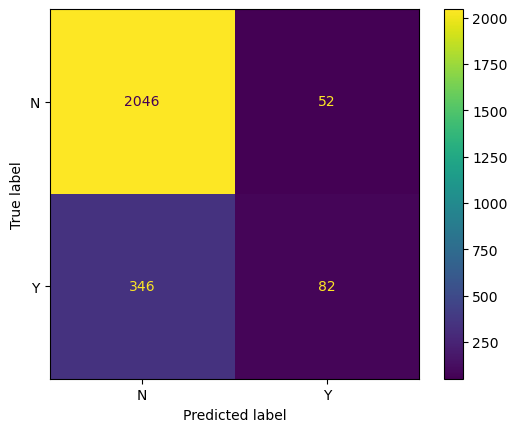

In [59]:
print("Salida de resultado de la evaluación correspondientes a la Prueba #2")
evaluar_modelo(random_search_KNN.best_estimator_, test_data, test_labels)

#### RandomForest con parametrización RandomizedSearch

In [60]:
# Define el espacio de búsqueda de hiperparámetros
param_dist = {
    'n_estimators': randint(10, 200), 
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['auto', 'sqrt', 'log2']
}

# Configura el clasificador y el proceso de búsqueda aleatoria
rfc = RandomForestClassifier()

random_search_rfc = RandomizedSearchCV( rfc, param_distributions=param_dist, 
    n_iter= 50, cv=5, scoring='accuracy', verbose=1, n_jobs=-1, random_state=42
)


In [61]:
with mlflow.start_run(run_name='RandomForest (#2)'):
    random_search_rfc.fit(train_data, train_labels)

random_search_rfc.best_estimator_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


c:\Users\usuario\anaconda3\envs\VIU-13MBID\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
75 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\usuario\anaconda3\envs\VIU-13MBID\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\usuario\anaconda3\envs\VIU-13MBID\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\usuario\anaconda3\envs\VIU-13MBID\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_p

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=14, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=9,
                       min_samples_split=3, min_weight_fraction_leaf=0.0,
                       n_estimators=93, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

Salida de resultado de la evaluación correspondientes a la Prueba #2
Rendimiento obtenido: 0.8895486935866983
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.92      0.95      0.93      2098
           Y       0.71      0.60      0.65       428

    accuracy                           0.89      2526
   macro avg       0.81      0.77      0.79      2526
weighted avg       0.88      0.89      0.89      2526

Matriz de confusión:


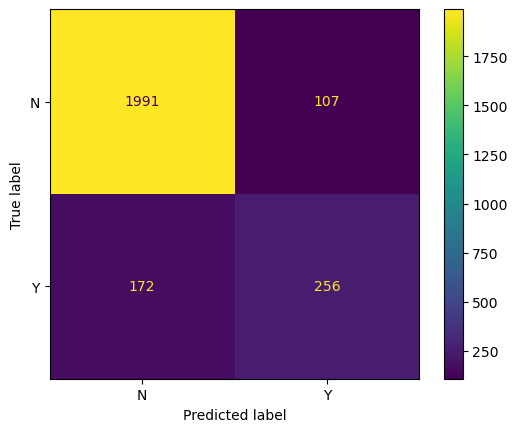

In [62]:
print("Salida de resultado de la evaluación correspondientes a la Prueba #2")
evaluar_modelo(random_search_rfc.best_estimator_, test_data, test_labels)

#### TODO: posibilidades de mejora de la libreta

* Evaluación del clasificador a través de validación cruzada
* Ejecutar pruebas que contemplen datos con mayor o menor grado de transformaciones aplicadas 
* Implementar clasificación con otras técnicas (por ejemplo: redes neuronales, SVM, entre otras)
* Evaluar la combinación de técnicas, por ejemplo: clustering y sobre esos resultados aplicación de árboles de decisión para detectar patrones de agrupamiento y ahí relacionarlo con la situación de los clientes.
* Integrar técnicas de extracción de reglas de asociación (con mayor "legibilidad" para usuarios no-técnicos)
* Entre otras opciones

----
### Prueba #3

En la siguiente prueba final se implementará algunos algoritmos de clasificación nuevos, y se analiza los resultados obtenidos para evaluar el rendimiento obtenido

In [11]:
mlflow.set_experiment(experiment_name="Prueba #3")
mlflow.autolog()

Traceback (most recent call last):
  File "c:\Users\usuario\anaconda3\envs\VIU-13MBID\Lib\site-packages\mlflow\store\tracking\file_store.py", line 303, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\usuario\anaconda3\envs\VIU-13MBID\Lib\site-packages\mlflow\store\tracking\file_store.py", line 396, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\usuario\anaconda3\envs\VIU-13MBID\Lib\site-packages\mlflow\store\tracking\file_store.py", line 1304, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\usuario\anaconda3\envs\VIU-13MBID\Lib\site-packages\mlflow\store\tracking\file_store.py", line 1297, in _read_helper
    result = read_yaml(root,

2023/12/01 15:12:57 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


#### XGBoost 

In [13]:
import xgboost as xgb

2023/12/01 15:13:09 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.
2023/12/01 15:13:09 INFO mlflow.tracking.fluent: Autologging successfully enabled for xgboost.


In [14]:
train_labels

array(['N', 'Y', 'Y', ..., 'N', 'N', 'N'], dtype=object)

Para la utilización de este algoritmo es necesario realizar una transformación al conjunto de etiquetas (N,Y) para obtener valores numéricos correspondientes (0 y 1)

In [15]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Crea una instancia de LabelEncoder
label_encoder = LabelEncoder()

# Aplica la transformación a las etiquetas
train_labels_numeric = label_encoder.fit_transform(train_labels)
test_labels_numeric= label_encoder.fit_transform(test_labels)
# Ahora train_labels_numeric contendrá los valores numéricos correspondientes (0 y 1)


In [16]:
train_labels_numeric

array([0, 1, 1, ..., 0, 0, 0])

In [17]:
# Configura los hiperparámetros de XGBoost
params = {
    'objective': 'binary:logistic',
    'max_depth': 5,
    'learning_rate': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'n_estimators': 100
}

# Configura el clasificador
xgb_classifier = xgb.XGBClassifier(**params)

# Ajusta el modelo con el conjunto de entrenamiento
with mlflow.start_run(run_name='XGBoost (#3)'):
    xgb_classifier.fit(train_data, train_labels_numeric)

2023/12/01 15:13:23 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\usuario\anaconda3\envs\VIU-13MBID\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:13:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified."
2023/12/01 15:13:32 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\usuario\anaconda3\envs\VIU-13MBID\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils."


Salida de resultado de la evaluación correspondientes a la Prueba #3
Rendimiento obtenido: 0.885193982581156
Reporte de indicadores:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93      2102
           1       0.70      0.55      0.62       424

    accuracy                           0.89      2526
   macro avg       0.81      0.75      0.77      2526
weighted avg       0.88      0.89      0.88      2526

Matriz de confusión:


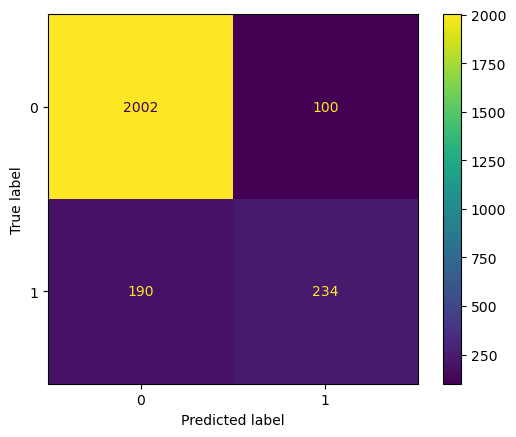

In [18]:
print("Salida de resultado de la evaluación correspondientes a la Prueba #3")
evaluar_modelo(xgb_classifier, test_data, test_labels_numeric)

#### AdaBoostClassifier

In [19]:
from sklearn.ensemble import AdaBoostClassifier

In [20]:
# Crear el modelo AdaBoostClassifier
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)
# Ajusta el modelo con el conjunto de entrenamiento
with mlflow.start_run(run_name='AdaBoostClassifier (#3)'):
    adaboost_model.fit(train_data, train_labels)


Salida de resultado de la evaluación correspondientes a la Prueba #3
Rendimiento obtenido: 0.8760886777513855
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.91      0.95      0.93      2102
           Y       0.67      0.52      0.59       424

    accuracy                           0.88      2526
   macro avg       0.79      0.74      0.76      2526
weighted avg       0.87      0.88      0.87      2526

Matriz de confusión:


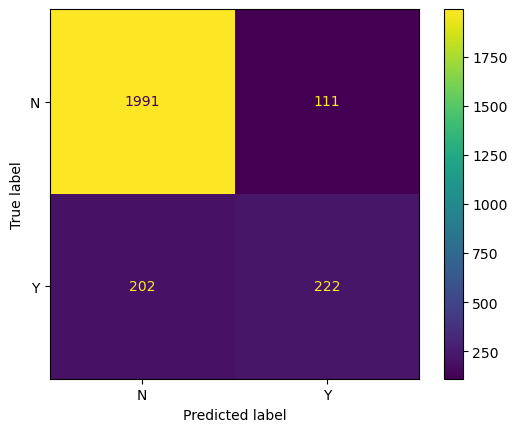

In [21]:
print("Salida de resultado de la evaluación correspondientes a la Prueba #3")
evaluar_modelo(adaboost_model, test_data, test_labels)

#### GradientBoostingClassifier

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
# Crear el modelo GradientBoostingClassifier

# Ajusta el modelo con el conjunto de entrenamiento
with mlflow.start_run(run_name='GradientBoostingClassifier (#3)'):
    gradient_boost_model = GradientBoostingClassifier(loss='exponential',criterion='squared_error', n_estimators=100, learning_rate=0.1, random_state=42)
    gradient_boost_model.fit(train_data, train_labels)



Salida de resultado de la evaluación correspondientes a la Prueba #3
Rendimiento obtenido: 0.8871733966745843
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.91      0.96      0.93      2102
           Y       0.72      0.54      0.62       424

    accuracy                           0.89      2526
   macro avg       0.81      0.75      0.78      2526
weighted avg       0.88      0.89      0.88      2526

Matriz de confusión:


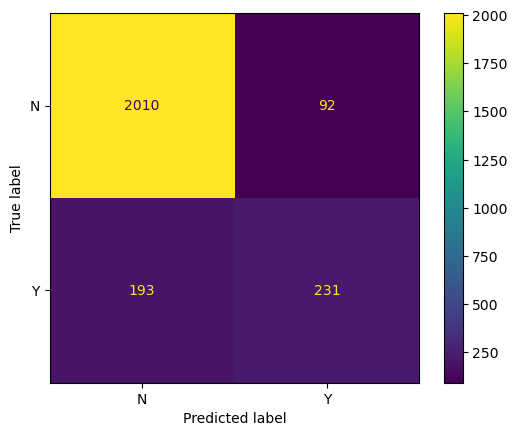

In [23]:
print("Salida de resultado de la evaluación correspondientes a la Prueba #3")
evaluar_modelo(gradient_boost_model, test_data, test_labels)

In [25]:
datos.columns

Index(['operaciones_ult_12m', 'gastos_ult_12m', 'limite_credito_tc',
       'antiguedad_cliente', 'tasa_interes', 'ingresos', 'pct_ingreso',
       'antiguedad_empleado', 'edad', 'estado_civil_N', 'estado_credito_N',
       'importe_solicitado', 'duracion_credito', 'situacion_vivienda',
       'objetivo_credito', 'falta_pago', 'estado_cliente', 'genero',
       'nivel_educativo', 'nivel_tarjeta', 'personas_a_cargo'],
      dtype='object')

----

### Prueba de despliegue (utilzando datos nuevos)

In [28]:
datos_nuevos = pd.read_csv('../../data/final/datos_nuevos(1).csv', sep=';')
datos_nuevos.head(5)

,id_cliente,edad,importe_solicitado,duracion_credito,antiguedad_empleado,situacion_vivienda,ingresos,objetivo_credito,pct_ingreso,tasa_interes,...,antiguedad_cliente,estado_civil,estado_cliente,gastos_ult_12m,genero,limite_credito_tc,nivel_educativo,nivel_tarjeta,operaciones_ult_12m,personas_a_cargo
0,708510993,22,4000,4,3.0,HIPOTECA,62000,PERSONAL,0.06,6.76,...,47,SOLTERO,ACTIVO,15478.0,F,4905.0,UNIVERSITARIO_INCOMPLETO,Blue,109.0,1.0
1,708512051,25,10000,2,3.0,ALQUILER,120000,INVERSIONES,0.08,9.32,...,18,CASADO,ACTIVO,3950.0,M,1663.0,UNIVERSITARIO_COMPLETO,Blue,82.0,3.0
2,708513258,23,1700,2,2.0,HIPOTECA,45000,SALUD,0.04,14.72,...,29,CASADO,ACTIVO,3078.0,M,4323.0,UNIVERSITARIO_INCOMPLETO,Blue,58.0,1.0
3,708514512,25,7200,4,0.0,ALQUILER,71604,PAGO_DEUDAS,0.10,10.95,...,29,CASADO,ACTIVO,4314.0,F,3809.0,UNIVERSITARIO_INCOMPLETO,Blue,81.0,2.0
4,708515472,26,5000,3,5.0,HIPOTECA,52000,PAGO_DEUDAS,0.10,10.59,...,36,CASADO,ACTIVO,4216.0,F,4712.0,SECUNDARIO_COMPLETO,Blue,82.0,1.0


**Importante**: recordar que si se implementan operaciones de transformación sobre los datos será necesario (posiblemente) replicarlas sobre los datos nuevos para que ambos datasets sean compatibles.

#### Se tienen que aplicar las adaptaciones realizadas sobre los datos de entrenamiento

In [29]:
# Columna: estado_civil
cambios_estado_civil = {
    'CASADO' : 'C',
    'SOLTERO' : 'S',
    'DESCONOCIDO' : 'N',
    'DIVORCIADO' : 'D',
}

estado_civil_N = datos_nuevos.loc[:, ('estado_civil')].map(cambios_estado_civil).rename('estado_civil')

# Columna: estado_credito
cambios_estado_credito = {
    0: 'C',
    1 : 'P',
}

estado_credito_N = datos_nuevos.loc[:, ('estado_credito')].map(cambios_estado_credito).rename('estado_credito')

# df_final = pd.concat([estado_civil_N, estado_credito_N, df_integrado], axis=1)
# df_final.head()

# Antiguedad del empleado

etiquetas_a_e = ['menor_10', '5_a_10', 'mayor_10']
rangos_a_e = [0, 4, 10, 50]
valor_para_nan = 'NA'
antiguedad_empleados_N = pd.cut(datos_nuevos['antiguedad_empleado'], 
                                bins=rangos_a_e, 
                                labels=etiquetas_a_e,
                                right=False).cat.add_categories(valor_para_nan).fillna(valor_para_nan)

# antiguedad_empleados_N.value_counts()

# edad

etiquetas_e = ['menor_25', '25_a_30']
rangos_e = [0, 24, 50]
edad_N = pd.cut(datos_nuevos['edad'], 
                                bins=rangos_e, 
                                labels=etiquetas_e)

# edad_N.value_counts()

# pct_ingreso

etiquetas_p_i = ['hasta_20', '20_a_40', '40_a_60', 'mayor_60']
rangos_p_i = [0, 0.19, 0.39, 0.60, 0.99]
pct_ingreso_N = pd.cut(datos_nuevos['pct_ingreso'], 
                                bins=rangos_p_i, 
                                labels=etiquetas_p_i)

# pct_ingreso_N.value_counts()

# ingresos

etiquetas_i = ['hasta_20k', '20k_a_50k', '50k_a_100k', 'mayor_100k']
rangos_i = [0, 19999, 49999, 99999, 999999]
ingresos_N = pd.cut(datos_nuevos['ingresos'], 
                                bins=rangos_i, 
                                labels=etiquetas_i)

# ingresos_N.value_counts()

# tasa_interes

etiquetas_t_i = ['hasta_7p', '7p_a_15p', '15p_a_20p', 'mayor_20p']
rangos_t_i = [0, 6.99, 14.99, 19.99, 100]
tasa_interes_N = pd.cut(datos_nuevos['tasa_interes'], 
                                bins=rangos_t_i, 
                                labels=etiquetas_t_i)

# tasa_interes_N.value_counts()

# antiguedad_cliente

etiquetas_a_c = ['menor_2y', '2y_a_4y', 'mayor_4y']
rangos_a_c = [0, 24, 48, 100]
antiguedad_cliente_N = pd.cut(datos_nuevos['antiguedad_cliente'], 
                                bins=rangos_a_c, 
                                labels=etiquetas_a_c)

# antiguedad_cliente_N.value_counts()

# limite_credito_tc

etiquetas_l_tc = ['menor_3k', '3k_a_5k', '5k_a_10k', 'mayor_10k']
rangos_l_tc = [0, 2999, 4999, 9999, 100000]
limite_credito_tc_N = pd.cut(datos_nuevos['limite_credito_tc'], 
                                bins=rangos_l_tc, 
                                labels=etiquetas_l_tc)

# limite_credito_tc_N.value_counts()

# gastos_ult_12m

etiquetas_g_u12 = ['menor_1k', '2k_a_4k', '4k_a_6k', '6k_a_8k', '8k_a_10k', 'mayor_10k']
rangos_g_u12 = [0, 999, 3999, 5999, 7999, 9999, 100000]
gastos_ult_12m_N = pd.cut(datos_nuevos['gastos_ult_12m'], 
                                bins=rangos_g_u12, 
                                labels=etiquetas_g_u12)

# gastos_ult_12m_N.value_counts()

# operaciones_ult_12m

etiquetas_o_u12 = ['menor_15', '15_a_30', '30_a_50', '50_a_75', '75_a_100', 'mayor_100']
rangos_o_u12 = [0, 14, 29, 49, 74, 99, 1000]
operaciones_ult_12m_N = pd.cut(datos_nuevos['operaciones_ult_12m'], 
                                bins=rangos_o_u12, 
                                labels=etiquetas_o_u12)

# operaciones_ult_12m_N.value_counts()

col_eliminar_final = [
              'edad',
              'antiguedad_empleado',
              'antiguedad_cliente', 
              'ingresos',
              'pct_ingreso', 
              'tasa_interes',
              'gastos_ult_12m', 
              'limite_credito_tc', 
              'operaciones_ult_12m',
              'nivel_tarjeta',
              'estado_civil',
              'estado_credito',
              'id_cliente']

datos_nuevos.drop(col_eliminar_final, inplace=True, axis=1)


df_nuevo = pd.concat([operaciones_ult_12m_N, gastos_ult_12m_N, limite_credito_tc_N, antiguedad_cliente_N, tasa_interes_N, ingresos_N, pct_ingreso_N, antiguedad_empleados_N, edad_N, estado_civil_N, estado_credito_N, datos_nuevos], axis=1)
df_nuevo.head(5)

,operaciones_ult_12m,gastos_ult_12m,limite_credito_tc,antiguedad_cliente,tasa_interes,ingresos,pct_ingreso,antiguedad_empleado,edad,estado_civil,estado_credito,importe_solicitado,duracion_credito,situacion_vivienda,objetivo_credito,estado_cliente,genero,nivel_educativo,personas_a_cargo
0,mayor_100,mayor_10k,3k_a_5k,2y_a_4y,hasta_7p,50k_a_100k,hasta_20,menor_10,menor_25,S,C,4000,4,HIPOTECA,PERSONAL,ACTIVO,F,UNIVERSITARIO_INCOMPLETO,1.0
1,75_a_100,2k_a_4k,menor_3k,menor_2y,7p_a_15p,mayor_100k,hasta_20,menor_10,25_a_30,C,C,10000,2,ALQUILER,INVERSIONES,ACTIVO,M,UNIVERSITARIO_COMPLETO,3.0
2,50_a_75,2k_a_4k,3k_a_5k,2y_a_4y,7p_a_15p,20k_a_50k,hasta_20,menor_10,menor_25,C,C,1700,2,HIPOTECA,SALUD,ACTIVO,M,UNIVERSITARIO_INCOMPLETO,1.0
3,75_a_100,4k_a_6k,3k_a_5k,2y_a_4y,7p_a_15p,50k_a_100k,hasta_20,menor_10,25_a_30,C,C,7200,4,ALQUILER,PAGO_DEUDAS,ACTIVO,F,UNIVERSITARIO_INCOMPLETO,2.0
4,75_a_100,4k_a_6k,3k_a_5k,2y_a_4y,7p_a_15p,50k_a_100k,hasta_20,5_a_10,25_a_30,C,C,5000,3,HIPOTECA,PAGO_DEUDAS,ACTIVO,F,SECUNDARIO_COMPLETO,1.0


In [30]:
nuevos_codif = pd.get_dummies(df_nuevo)
nuevos_codif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 65 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   importe_solicitado                        112 non-null    int64  
 1   duracion_credito                          112 non-null    int64  
 2   personas_a_cargo                          112 non-null    float64
 3   operaciones_ult_12m_menor_15              112 non-null    bool   
 4   operaciones_ult_12m_15_a_30               112 non-null    bool   
 5   operaciones_ult_12m_30_a_50               112 non-null    bool   
 6   operaciones_ult_12m_50_a_75               112 non-null    bool   
 7   operaciones_ult_12m_75_a_100              112 non-null    bool   
 8   operaciones_ult_12m_mayor_100             112 non-null    bool   
 9   gastos_ult_12m_menor_1k                   112 non-null    bool   
 10  gastos_ult_12m_2k_a_4k                

In [33]:
nuevos_codif.shape

(112, 65)

In [38]:
data.shape

(10101, 65)

In [35]:
# Dado que puede haber diferencias con el set de entrenamiento se emparejan

columnas_faltantes = set(data.columns) - set(nuevos_codif.columns)
display(columnas_faltantes)
for columna in columnas_faltantes:
    nuevos_codif[columna] = 0 # Se agregan las columnas faltantes con valor 0

print('Datos nuevos: ' + str(len(nuevos_codif.columns)))
print('Datos entrenamiento: ' + str(len(data.columns)))
print(set(data.columns) - set(nuevos_codif.columns))

{'antiguedad_empleado_menor_5',
 'estado_civil_N_C',
 'estado_civil_N_D',
 'estado_civil_N_N',
 'estado_civil_N_S',
 'estado_credito_N_C',
 'estado_credito_N_P',
 'situacion_vivienda_OTROS'}

Datos nuevos: 73
Datos entrenamiento: 65
set()


In [39]:
nuevos_codif = nuevos_codif[data.columns]
nuevos_codif.columns

Index(['importe_solicitado', 'duracion_credito', 'personas_a_cargo',
       'operaciones_ult_12m_15_a_30', 'operaciones_ult_12m_30_a_50',
       'operaciones_ult_12m_50_a_75', 'operaciones_ult_12m_75_a_100',
       'operaciones_ult_12m_mayor_100', 'operaciones_ult_12m_menor_15',
       'gastos_ult_12m_2k_a_4k', 'gastos_ult_12m_4k_a_6k',
       'gastos_ult_12m_6k_a_8k', 'gastos_ult_12m_8k_a_10k',
       'gastos_ult_12m_mayor_10k', 'gastos_ult_12m_menor_1k',
       'limite_credito_tc_3k_a_5k', 'limite_credito_tc_5k_a_10k',
       'limite_credito_tc_mayor_10k', 'limite_credito_tc_menor_3k',
       'antiguedad_cliente_2y_a_4y', 'antiguedad_cliente_mayor_4y',
       'antiguedad_cliente_menor_2y', 'tasa_interes_15p_a_20p',
       'tasa_interes_7p_a_15p', 'tasa_interes_hasta_7p',
       'tasa_interes_mayor_20p', 'ingresos_20k_a_50k', 'ingresos_50k_a_100k',
       'ingresos_hasta_20k', 'ingresos_mayor_100k', 'pct_ingreso_20_a_40',
       'pct_ingreso_40_a_60', 'pct_ingreso_hasta_20', 'pct_ingr

Realizamos la predicción con el mejor modelo entrenado y con los nuevos datos

In [62]:
# Se hace la predicción con los nuevos datos

prediccion_nuevos = random_search_dtc.predict(nuevos_codif)

prediccionDF = pd.DataFrame(prediccion_nuevos)

2023/12/01 18:41:23 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\usuario\anaconda3\envs\VIU-13MBID\Lib\site-packages\mlflow\data\pandas_dataset.py:116: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."


In [63]:
# Se agrega la nueva columna
datos_nuevos['prediccion_mora'] = prediccionDF
datos_nuevos['prediccion_mora'].value_counts()

prediccion_mora
N    87
Y    25
Name: count, dtype: int64